In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
import matplotlib.animation as animation
import matplotlib.image as mpimg
import subprocess
import matplotlib.image as mpimg
import matplotlib
import time
import glob
import gc
import pickle
import tqdm
from spacepy import pycdf

os.environ["CDF_LIB"] = "~/CDF/lib"

In [2]:
# stations = ['B10', 'STJ', 'FSP', 'PHU', 'T31', 'TUC', 'SOR', 'SKT', 'M05', 'BOR', 
# 			'HOP', 'GDH', 'ABK', 'DLT', 'NUR', 'LAN', 'AMD', 'KAG', 'SVS', 'NEW', 
# 			'LRV', 'DMC', 'SPT', 'T61', 'SHE', 'B11', 'MIZ', 'B14', 'UMQ', 'C12', 
# 			'TIR', 'CZT', 'SUW', 'KAK', 'MAB', 'SZC', 'DUR', 'KTB', 'MEK', 'GUA', 
# 			'T36', 'ZAG', 'ARS', 'PBK', 'B12', 'TAR', 'CSY', 'KMH', 'SJG', 'B23', 
# 			'HUA', 'TIK', 'BFO', 'NGK', 'DOU', 'MEA', 'PG1', 'STF', 'KIR', 'HAD', 
# 			'T24', 'KIL', 'PIN', 'KTN', 'HOB', 'MBO', 'T25', 'DES', 'EUS', 'B20', 
# 			'LGZ', 'GHC', 'SUA', 'HLN', 'WNG', 'CHD', 'T35', 'LCL', 'PAG', 'BMT', 
# 			'IPM', 'CNH', 'T43', 'RES', 'HLP', 'PAC', 'PEG', 'KDU', 'MAW', 'OUJ', 
# 			'C11', 'WMQ', 'SFS', 'PAF', 'HVD', 'T23', 'BDV', 'BSL', 'ESK', 'API', 
# 			'INK', 'KUJ', 'T58', 'BOU', 'T37', 'MOS', 'NAB', 'JAI', 'T17', 'LYC', 
# 			'HYB', 'DMH', 'KOU', 'PST', 'SBA', 'T22', 'CBB', 'GNA', 'HAN', 'PEL', 
# 			'ILR', 'NOR', 'AAE', 'CLF', 'KUV', 'A04', 'BEL', 'BOX', 'NCK', 'LZH', 
# 			'HRN', 'VSS', 'ASC', 'CNB', 'AAA', 'THY', 'T32', 'FCC', 'LER', 'KEV', 
# 			'T15', 'SIT', 'KAR', 'CMD', 'RAN', 'UPN', 'GNG', 'HRB', 'M04', 'FHB', 
# 			'AMS', 'C05', 'LKW', 'B07', 'HER', 'ONW', 'B22', 'MGD', 'NAQ', 'RIK', 
# 			'LOZ', 'DOB', 'DRV', 'SCO', 'UPS', 'DIK', 'IZN', 'LET', 'MUO', 'T03', 
# 			'ATU', 'EYR', 'KNZ', 'CEB', 'VIC', 'A03', 'NAL', 'C07', 'GZH', 'CMO', 
# 			'OTT', 'RPB', 'DON', 'LRM', 'E05', 'ASP', 'IVA', 'MUT', 'SOD', 'MCQ', 
# 			'TRO', 'MMB', 'ROE', 'KRT', 'C04', 'B18', 'ISL', 'BLC', 'VAL', 'RAL', 
# 			'SHU', 'TWN', 'M08', 'HON', 'NAN', 'BRW', 'T56', 'B21', 'RVK', 'FRD', 
# 			'CY0', 'AND', 'KIV', 'BFE', 'M01', 'LIV', 'DED', 'IRT', 'VRE', 'CTA', 
# 			'MSR', 'PTK', 'LVV', 'TDC', 'C06', 'BJN', 'GHB', 'NVS', 'FMC', 'GIM', 
# 			'B03', 'T42', 'JCK', 'CAN', 'EBR', 'ABG', 'GUI', 'FRN', 'A02', 'YKC', 
# 			'PPT', 'PET', 'A08', 'FUR', 'AQU', 'KNY', 'HBK', 'T59', 'T21', 'GCK', 
# 			'T40', 'YAK', 'IQA', 'M06', 'THL', 'DRW', 'FYU', 'GAK', 'PKR', 'OSO', 
# 			'TRW', 'CER', 'YAP', 'A01', 'T38', 'IGC', 'CUL', 'DAW', 'PGC', 'FSJ', 
# 			'ASB', 'T39', 'PG2', 'T33', 'TAL', 'SOL', 'LYR', 'T29', 'ZGN', 'MAS', 
# 			'PTN', 'RED', 'TSU', 'SMI', 'AMA', 'C10', 'KAV', 'BCL', 'T41', 'C08', 
# 			'BRZ', 'C01', 'PAL', 'BBG', 'T16', 'A05', 'ICA', 'JYP', 'CHC', 'CDO', 
# 			'CDC', 'T30', 'SCN', 'ANC', 'BKL', 'WAD', 'PIL', 'ROC', 'WHS', 'LWA', 
# 			'JRS', 'ODE', 'BIK', 'B19', 'B16', 'BNG', 'AMK', 'TAN', 'ISK', 'PBQ', 
# 			'DSO', 'GTF', 'YOR', 'DNB', 'MCR', 'MSH', 'CLK', 'JAN', 'LOV', 'CNL', 
# 			'NRD', 'HTY', 'EKP', 'DLR', 'FAR', 'CBI', 'MID', 'EWA', 'LEK', 'SPA', 
# 			'TAM', 'ALE', 'HLL', 'VIZ', 'MCM', 'S01', 'KVI', 'GML', 'LNP', 'EAG', 
# 			'LMM', 'APL', 'USC', 'MCG', 'OUL', 'QSB', 'FIT', 'ZYK', 'ARC', 'JAX', 
# 			'TND', 'BET', 'PPI', 'B17', 'B15', 'MBC', 'LEM', 'BSV', 'WEP', 'VOS', 
# 			'GLN', 'DVS', 'DAL', 'MIR', 'KOT', 'KAT', 'ADL', 'MCW', 'LOP', 'CPS', 
# 			'MCN', 'CKA', 'PBC', 'AIA', 'CCS', 'HIS', 'YMK', 'ELT', 'LSK', 'MLB', 
# 			'T51', 'NMP', 'ESC', 'ESA', 'T28', 'BGY', 'OHI', 'T57', 'T20', 'KEP', 
# 			'CRP', 'T19', 'HOR', 'B13', 'B27', 'M09', 'TEO', 'B09', 'FYM', 'TGG', 
# 			'M07', 'A06', 'LAG', 'M10', 'MND', 'VLO', 'CKT', 'SER', 'ANT', 'AMU', 
# 			'HOM', 'ASW', 'HLM', 'B24', 'NOK', 'T18', 'HRP', 'CDP', 'M03', 'G01', 
# 			'PUT', 'ROT', 'KPG', 'B08', 'PRP', 'TRP', 'EDM', 'T34', 'PNT', 'B05', 
# 			'VLD', 'WEW', 'B04', 'B02', 'MLT', 'ENP', 'B06', 'CRK', 'BRD', 'BRN', 
# 			'C13', 'CYG', 'HOV', 'JCO', 'LON', 'PG0', 'PG3', 'PG5', 'SBL', 'SPG', 
# 			'T44', 'T45', 'T46', 'T47', 'T48', 'T49', 'T50', 'T52', 'TAB', 'VNA', 
# 			'WIC', 'SON', 'PG4', 'KHB', 'C03', 'C02', 'SUM', 'GAN', 'CKI', 'ORC', 
# 			'T54', 'T55', 'KLD', 'T53', 'A07', 'SBH', 'A13', 'A12', 'GSI', 'P01', 
# 			'RNC', 'CST', 'VYH']

twins_dir = '../data/twins/'
supermag_dir = '../data/supermag/'
regions_dict = '../identifying_regions/outputs/twins_era_identified_regions_min_2.pkl'

In [3]:
region_numbers = [83, 143, 223, 44, 173, 321, 366, 383, 122, 279, 14, 95, 237, 26, 166, 86,
						387, 61, 202, 287, 207, 361, 137, 184, 36, 19, 9, 163, 16, 270, 194, 82,
						62, 327, 293, 241, 107, 55, 111]

with open(regions_dict, 'rb') as f:
	regions = pickle.load(f)

regions = {f'region_{reg}': regions[f'region_{reg}'] for reg in region_numbers}

dates = pd.read_csv('ENA_TimeStamp.csv', header=None, names=['YYYYMMDD', 'start', 'end'])
times = pd.read_feather('outputs/regular_twins_map_dates.feather')

In [4]:
stations = []

for region in regions.keys():
	stations_to_add = [stat for stat in regions[region]['station'] if stat not in stations]
	stations = stations + stations_to_add

In [5]:
dates['start'] = pd.to_datetime(dates.YYYYMMDD.astype(str)+' '+dates.start.astype(str), format='%Y%m%d %H:%M:%S')
dates['end'] = pd.to_datetime(dates.YYYYMMDD.astype(str)+' '+dates.end.astype(str), format='%Y%m%d %H:%M:%S')
dates.drop('YYYYMMDD', inplace=True, axis=1)

In [6]:
gap, gap_min, duration = [], [], []
for i in range(len(dates)):
	if i == (len(dates)-1):
		gap.append(np.nan)
		gap_min.append(np.nan)
		dur = dates['end'][i] - dates['start'][i]
		duration.append(dur.total_seconds()/60)
	else:
		time_diff = dates['start'][i+1] - dates['end'][i]
		dur = dates['end'][i] - dates['start'][i]
		duration.append(dur.total_seconds()/60)
		gap.append(time_diff)
		gap_min.append(time_diff.total_seconds()/60)
dates['duration'] = duration
dates['gap_to_next'] = gap
dates['gap_in_minutes'] = gap_min

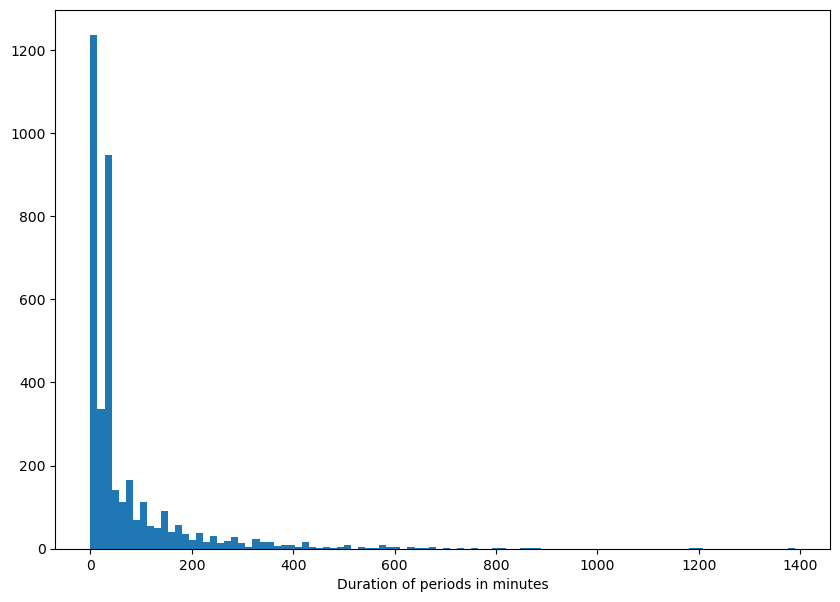

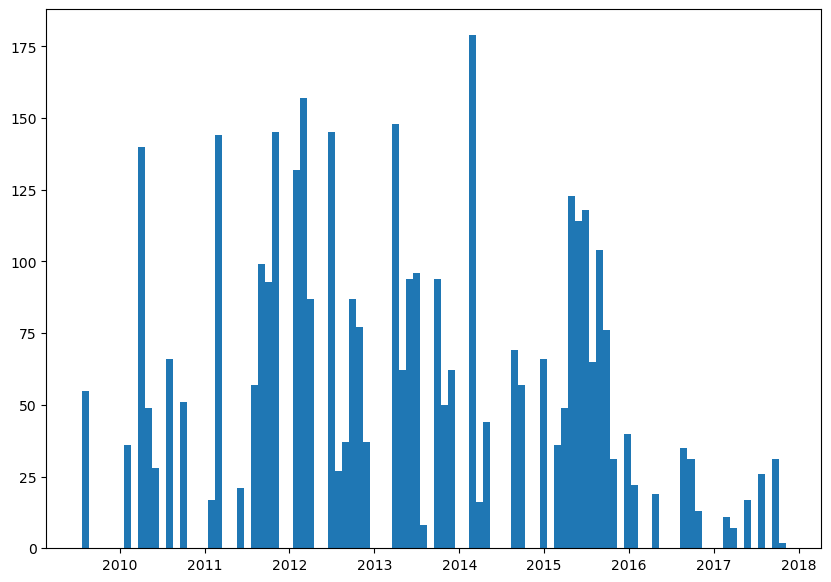

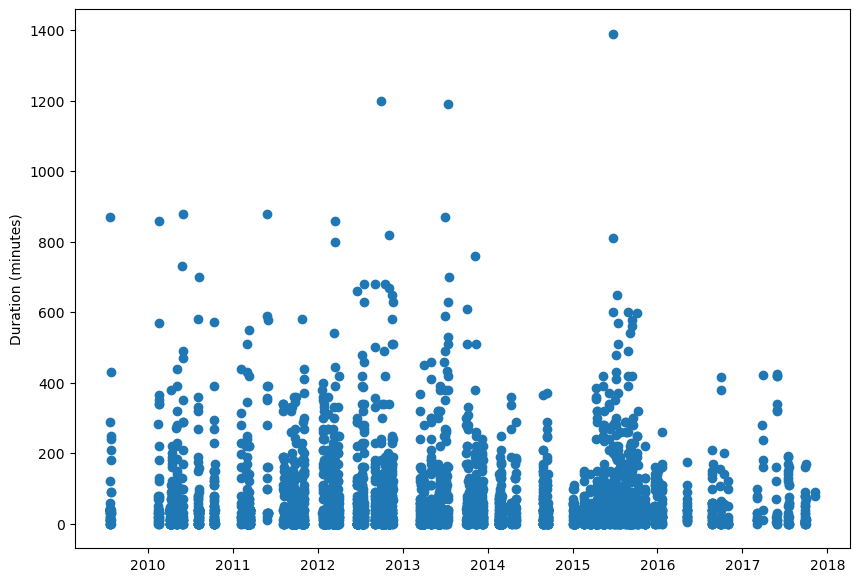

In [7]:
plt.figure(figsize=(10,7))
plt.hist(dates['duration'], bins=100)
plt.xlabel('Duration of periods in minutes')
plt.show()

plt.figure(figsize=(10,7))
plt.hist(dates['start'], bins=100)
plt.show()

plt.figure(figsize=(10,7))
plt.scatter(dates['start'], dates['duration'])
plt.ylabel('Duration (minutes)')
plt.show()


In [8]:
twins_periods = {}
i = 0
while i < len(dates):
	start = dates['start'][i]
	while dates['gap_in_minutes'][i] <= 60:
		i+=1
	end = dates['end'][i] + datetime.timedelta(minutes=15)
	period = [start, end]
	period = pd.DataFrame({'date':period})
	period['date'] = period['date'].dt.round('min')
	period.set_index('date', inplace=True)
	period = period.resample('1 min').bfill()
	twins_periods[f'period_{i}'] = period
	i+=1

In [9]:
twins_periods.keys()

dict_keys(['period_18', 'period_54', 'period_71', 'period_75', 'period_86', 'period_90', 'period_108', 'period_115', 'period_141', 'period_161', 'period_165', 'period_175', 'period_189', 'period_195', 'period_197', 'period_213', 'period_230', 'period_241', 'period_242', 'period_250', 'period_261', 'period_279', 'period_288', 'period_293', 'period_299', 'period_307', 'period_315', 'period_328', 'period_348', 'period_373', 'period_374', 'period_387', 'period_394', 'period_396', 'period_410', 'period_424', 'period_428', 'period_429', 'period_441', 'period_503', 'period_514', 'period_525', 'period_551', 'period_585', 'period_591', 'period_596', 'period_601', 'period_606', 'period_614', 'period_626', 'period_652', 'period_663', 'period_671', 'period_685', 'period_686', 'period_690', 'period_694', 'period_709', 'period_741', 'period_745', 'period_758', 'period_773', 'period_779', 'period_792', 'period_795', 'period_799', 'period_801', 'period_810', 'period_811', 'period_817', 'period_827', '

In [10]:
twins_files = sorted(glob.glob(twins_dir+'*.cdf', recursive=True))

maps = {}
maps_array = []

for file in twins_files:
	twins_map = pycdf.CDF(file)
	for i, date in enumerate(twins_map['Epoch']):
		check = pd.to_datetime(date.strftime(format='%Y-%m-%d %H:%M:%S'), format='%Y-%m-%d %H:%M:%S')
		if check in times.values:
			maps[check.round('T').strftime(format='%Y-%m-%d %H:%M:%S')] = twins_map['Ion_Temperature'][i][50:140,40:100]
			maps_array.append(twins_map['Ion_Temperature'][i][50:140,40:100])

In [26]:
temp_map = pycdf.CDF(twins_files[0])
print(len(np.unique(maps['2012-03-09 02:50:00'])))


33965


In [11]:
def assigning_color(df):
	'''Making color columns.
		Inputs:
		df: dataframe to be analyzed
		station: station in question(will be looped over from list of stations) 
	'''

	# defining the threshold conditions
	conditions = [(df['dbht'] < 50),
					(df['dbht'] > 50) & (df['dbht'] < 100),
					(df['dbht'] > 100 ) & (df['dbht'] < 200),
					(df['dbht'] > 200)]

	color = ['green', 'orange', 'red', 'black'] # colors assigned based on threshold conditions

	df['color'] = np.select(conditions, color) # making the color column

	return df

In [12]:
def combining_mag_station_data(stations, delay, elements):

	combined_dict = {}
	elements = [pd.to_datetime(element) for element in elements]
	for station in tqdm.tqdm(stations):
		df = pd.read_feather(f'../data/supermag/{station}.feather')
		df = assigning_color(df)
		df.set_index('Date_UTC', inplace=True)
		df.index = pd.to_datetime(df.index, format='%Y-%m-%d %H:%M:%S')
		df = df[['MLAT', 'MLT', 'dbht', 'color']]
		for col in df.columns:
			df[f'{col}_delay_{delay}'] = df[col].shift(-delay)
		df.drop(['MLAT', 'MLT', 'dbht', 'color'], inplace=True, axis=1)
		try:
			df = df.loc[elements]
		except KeyError:
			continue
		combined_dict[station] = df
	
	return combined_dict

In [13]:
starts = ['2012-03-09 00:00:00', '2012-03-12 00:00:00', '2015-03-17 00:00:00']
ends = ['2012-03-10 00:00:00', '2012-03-13 00:00:00', '2015-03-18 12:00:00']
names = ['2012-03-09', '2012-03-12', '2015-03-17']

starts = [pd.to_datetime(start, format='%Y-%m-%d %H:%M:%S') for start in starts]
ends = [pd.to_datetime(end, format='%Y-%m-%d %H:%M:%S') for end in ends]

for name in names:
	if not os.path.exists(f'plots/{name}'):
		os.makedirs(f'plots/{name}')
map_keys = list(maps.keys())
map_keys = [pd.to_datetime(key, format='%Y-%m-%d %H:%M:%S') for key in map_keys]

In [16]:
for name, start, end in zip(names, starts, ends):

	delays = [-20, -10, -5, 0, 5, 10, 20, 30, 45, 60]

	for delay in delays:

		twins_segments = [key for key in map_keys if key >= start and key <= end]

		if not os.path.exists(f'plots/{name}/delay_{delay}'):
				os.makedirs(f'plots/{name}/delay_{delay}')

		combined_dict = combining_mag_station_data(stations, delay=delay, elements=twins_segments)

		for k, tmap in enumerate(twins_segments):
			
			stime = time.time()

			tmap = tmap.strftime(format='%Y-%m-%d %H:%M:%S')

			fig = plt.figure(figsize=(15,10))

			ax1 = plt.subplot(1,2,1)
			plt.imshow(maps[tmap], origin='lower')
			plt.title(tmap)
			plt.clim(vmin=-1, vmax=35)
			plt.colorbar()

			ax2 = plt.subplot(1,2,2)
			plt.ylabel('MLAT')
			plt.xlabel('MLT')
			MLT, MLAT, dbht, colors = [], [], [], []
			for station in combined_dict.keys():
				try:
					if np.isnan(combined_dict[station][f'MLAT_delay_{delay}'][tmap]) or np.isnan(combined_dict[station][f'MLT_delay_{delay}'][tmap]):
						continue
					MLT.append(combined_dict[station][f'MLT_delay_{delay}'][tmap])
					MLAT.append(combined_dict[station][f'MLAT_delay_{delay}'][tmap])
					dbht.append(combined_dict[station][f'dbht_delay_{delay}'][tmap])
					colors.append(combined_dict[station][f'color_delay_{delay}'][tmap])
					
				except KeyError:
					continue
			plt.ylim(20, 90)
			plt.xlim(0,24)
			plt.axhline(70, linestyle='--', color='black', linewidth=1, alpha=0.3)
			plt.axhline(50, linestyle='--', color='black', linewidth=1, alpha=0.3)
			plt.axvline(6, linestyle='--', color='black', linewidth=1, alpha=0.3)
			plt.axvline(12, linestyle='--', color='black', linewidth=1, alpha=0.3)
			plt.axvline(18, linestyle='--', color='black', linewidth=1, alpha=0.3)
			scatter = plt.scatter(x=MLT, y=MLAT, color=colors, s=dbht)
			plt.legend(handles=scatter.legend_elements()[0], 
						)
			plt.title(f'dB/dt delayed {delay} minutes')

			plt.savefig(f'plots/{name}/delay_{delay}/figure_{k}.png')
			plt.close()

			gc.collect()
		print(f'Finished. Time: {((time.time()-stime)/60):2f} minutes')


100%|██████████| 71/71 [02:19<00:00,  1.96s/it]
/home/mcoughlan/anaconda3/envs/env/lib/python3.8/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


Finished. Time: 0.009948 minutes


100%|██████████| 71/71 [02:17<00:00,  1.94s/it]
/home/mcoughlan/anaconda3/envs/env/lib/python3.8/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


Finished. Time: 0.016404 minutes


100%|██████████| 71/71 [02:17<00:00,  1.94s/it]
/home/mcoughlan/anaconda3/envs/env/lib/python3.8/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


Finished. Time: 0.021779 minutes


100%|██████████| 71/71 [02:17<00:00,  1.94s/it]
/home/mcoughlan/anaconda3/envs/env/lib/python3.8/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


Finished. Time: 0.028370 minutes


100%|██████████| 71/71 [02:16<00:00,  1.93s/it]
/home/mcoughlan/anaconda3/envs/env/lib/python3.8/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


Finished. Time: 0.032852 minutes


100%|██████████| 71/71 [02:16<00:00,  1.92s/it]
/home/mcoughlan/anaconda3/envs/env/lib/python3.8/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


Finished. Time: 0.039620 minutes


100%|██████████| 71/71 [02:16<00:00,  1.93s/it]
/home/mcoughlan/anaconda3/envs/env/lib/python3.8/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


Finished. Time: 0.044533 minutes


100%|██████████| 71/71 [02:15<00:00,  1.92s/it]
/home/mcoughlan/anaconda3/envs/env/lib/python3.8/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


Finished. Time: 0.050443 minutes


100%|██████████| 71/71 [02:17<00:00,  1.94s/it]
/home/mcoughlan/anaconda3/envs/env/lib/python3.8/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


Finished. Time: 0.057327 minutes


100%|██████████| 71/71 [02:18<00:00,  1.95s/it]
/home/mcoughlan/anaconda3/envs/env/lib/python3.8/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


Finished. Time: 0.062996 minutes


100%|██████████| 71/71 [02:16<00:00,  1.92s/it]
/home/mcoughlan/anaconda3/envs/env/lib/python3.8/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


Finished. Time: 0.068429 minutes


100%|██████████| 71/71 [02:16<00:00,  1.93s/it]
/home/mcoughlan/anaconda3/envs/env/lib/python3.8/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


Finished. Time: 0.072589 minutes


100%|██████████| 71/71 [02:18<00:00,  1.95s/it]
/home/mcoughlan/anaconda3/envs/env/lib/python3.8/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


Finished. Time: 0.078323 minutes


100%|██████████| 71/71 [02:16<00:00,  1.93s/it]
/home/mcoughlan/anaconda3/envs/env/lib/python3.8/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


Finished. Time: 0.083517 minutes


100%|██████████| 71/71 [02:17<00:00,  1.93s/it]
/home/mcoughlan/anaconda3/envs/env/lib/python3.8/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


Finished. Time: 0.089307 minutes


100%|██████████| 71/71 [02:17<00:00,  1.94s/it]
/home/mcoughlan/anaconda3/envs/env/lib/python3.8/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


Finished. Time: 0.095241 minutes


100%|██████████| 71/71 [02:16<00:00,  1.92s/it]
/home/mcoughlan/anaconda3/envs/env/lib/python3.8/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


Finished. Time: 0.100439 minutes


100%|██████████| 71/71 [02:16<00:00,  1.92s/it]
/home/mcoughlan/anaconda3/envs/env/lib/python3.8/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


Finished. Time: 0.103797 minutes


100%|██████████| 71/71 [02:14<00:00,  1.90s/it]
/home/mcoughlan/anaconda3/envs/env/lib/python3.8/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


Finished. Time: 0.108735 minutes


100%|██████████| 71/71 [02:14<00:00,  1.90s/it]
/home/mcoughlan/anaconda3/envs/env/lib/python3.8/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


Finished. Time: 0.113952 minutes


100%|██████████| 71/71 [02:14<00:00,  1.90s/it]
/home/mcoughlan/anaconda3/envs/env/lib/python3.8/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


Finished. Time: 0.119615 minutes


100%|██████████| 71/71 [02:16<00:00,  1.93s/it]
/home/mcoughlan/anaconda3/envs/env/lib/python3.8/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


Finished. Time: 0.121079 minutes


100%|██████████| 71/71 [02:19<00:00,  1.96s/it]
/home/mcoughlan/anaconda3/envs/env/lib/python3.8/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


Finished. Time: 0.123798 minutes


100%|██████████| 71/71 [02:15<00:00,  1.91s/it]
/home/mcoughlan/anaconda3/envs/env/lib/python3.8/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


Finished. Time: 0.127497 minutes


100%|██████████| 71/71 [02:16<00:00,  1.93s/it]
/home/mcoughlan/anaconda3/envs/env/lib/python3.8/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


Finished. Time: 0.131067 minutes


100%|██████████| 71/71 [02:16<00:00,  1.93s/it]
/home/mcoughlan/anaconda3/envs/env/lib/python3.8/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


Finished. Time: 0.135345 minutes


100%|██████████| 71/71 [02:14<00:00,  1.89s/it]
/home/mcoughlan/anaconda3/envs/env/lib/python3.8/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


Finished. Time: 0.137814 minutes


100%|██████████| 71/71 [02:17<00:00,  1.93s/it]
/home/mcoughlan/anaconda3/envs/env/lib/python3.8/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


Finished. Time: 0.141875 minutes


100%|██████████| 71/71 [02:14<00:00,  1.89s/it]
/home/mcoughlan/anaconda3/envs/env/lib/python3.8/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


Finished. Time: 0.144453 minutes


100%|██████████| 71/71 [02:14<00:00,  1.89s/it]
/home/mcoughlan/anaconda3/envs/env/lib/python3.8/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


Finished. Time: 0.148814 minutes


In [15]:

# i = 2
# MLT, MLAT, dE, dN, colors = [], [], [], [], []
# for station in dict.keys():
# 	if np.isnan(dict[station]['MLT'][i]) or np.isnan(dict[station]['MLT'][i]) or np.isnan(dict[station]['dE'][i]) or np.isnan(dict[station]['dN'][i]):
# 		continue
# 	MLT.append(dict[station]['MLT'][i])
# 	MLAT.append(dict[station]['MLAT'][i])
# 	dE.append(dict[station]['dE'][i])
# 	dN.append(dict[station]['dN'][i])
# 	colors.append(dict[station]['color'][i])
# 	if dict[station]['color'][i] == '0':
# 		print(dict[station])

# print(colors)

# scale = 2*(np.amax([np.amax(dE), np.amax(dN)]))

# plt.figure(figsize=(10,7))
# Q = plt.quiver(MLT, MLAT, dE/scale, dN/scale, angles='uv', pivot='tail', color=colors, scale=1)
# plt.quiverkey(Q, 0.2, -0.05, 0.05, label = '<50 nT/min', color='green', labelpos='E')
# plt.quiverkey(Q, 0.6, -0.05, 0.05, label = '50-100 nT/min', color='orange', labelpos='E')
# plt.quiverkey(Q, 0.2, -0.1, 0.05, label = '100-200 nT/min', color='red', labelpos='E')
# plt.quiverkey(Q, 0.6, -0.1, 0.05, label = '>200 nT/min', color='black', labelpos='E')
# plt.tick_params(axis='x')
# plt.tick_params(axis='y')

# plt.show()